In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!ls
!rm -fr darknet
!git clone https://github.com/AlexeyAB/darknet/

In [0]:
cp drive/'My Drive'/helmet/data_for_colab.zip /content/darknet

In [0]:
cp drive/'My Drive'/helmet/yolov3_custom.cfg /content/darknet

In [0]:
cd darknet

In [0]:
ls

In [0]:
!unzip data_for_colab

In [0]:
#upload train test.txt files
from google.colab import files
uploaded = files.upload() 
for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)
    print ('saved file', name)

In [0]:
!apt-get update
!apt-get upgrade

In [0]:
!apt-get install build-essential
!apt-get install cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev

In [0]:
!apt-get install libavcodec-dev libavformat-dev libswscale-d

In [0]:
!apt-get -y install cmake
!which cmake

!cmake --version

In [0]:
!apt-get install libopencv-dev

In [0]:
!apt-get install vim

In [0]:
ls

In [0]:
#Now let's get some YOLOv3 weights from the official site
!ls
!wget https://pjreddie.com/media/files/yolov3.weights

In [0]:
#Moving the cfg file
cp drive/'My Drive'/yolov3/yolov3.cfg /content/darknet/data_for_colab

In [0]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

In [0]:
#No here we're modifying the makefile to set OPENCV and GPU to 1
!ls
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile

In [0]:
!ls
%cd ../
!ls

In [0]:
!apt install g++-5
!apt install gcc-5

!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 10
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 20
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 10
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 20
!update-alternatives --install /usr/bin/cc cc /usr/bin/gcc 30
!update-alternatives --set cc /usr/bin/gcc
!update-alternatives --install /usr/bin/c++ c++ /usr/bin/g++ 30
!update-alternatives --set c++ /usr/bin/g++

In [0]:
#Now, here's a bunch of code that takes the longest to execute here but
#It's about installing CUDA and using the beautiful Tesla K80 GPU, so that
#Will worth it

!apt update -qq;
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!apt-get update -qq

#Here were are installing compilers and creating some links
!apt-get install cuda -y -qq #gcc-5 g++-5 
#!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc
#!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++
!apt update
!apt upgrade
!apt install cuda-8.0 -y

In [0]:
#Now let's see whether the GPU is here and CUDA was successfully installed!
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)

print("'sup!'")

!/usr/local/cuda/bin/nvcc --version

In [0]:
ls

cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb  drive/
darknet/                                               sample_data/


In [0]:
%cd darknet
!make

In [0]:
!ls
#Now, let's see if everything works by running it on a test image
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

3rdparty      CMakeLists.txt	      data_for_colab.zip     obj
appveyor.yml  darknet		      image_yolov2.sh	     README.md
backup	      darknet53.conv.74       image_yolov3.sh	     results
build	      DarknetConfig.cmake.in  include		     scripts
build.ps1     darknet.py	      json_mjpeg_streams.sh  src
build.sh      darknet_video.py	      LICENSE		     video_v2.sh
cfg	      data		      Makefile		     video_yolov3.sh
cmake	      data_for_colab	      net_cam_v3.sh
/bin/bash: ./darknet: Is a directory


In [0]:
#Let's define some functions that will let us show images, and upload and 
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

In [0]:
imShow('predictions.jpg')

In [0]:
ls

3rdparty/     cmake/                  image_yolov2.sh*        obj/
appveyor.yml  CMakeLists.txt          image_yolov3.sh*        README.md
backup/       darknet*                include/                results/
build/        DarknetConfig.cmake.in  json_mjpeg_streams.sh*  scripts/
build.ps1*    darknet.py              LICENSE                 src/
build.sh*     darknet_video.py        Makefile                video_v2.sh*
cfg/          data/                   net_cam_v3.sh*          video_yolov3.sh*


In [0]:
!./darknet detector train data_for_colab/obj.data data_for_colab/yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_last.weights -dont_show -map

In [0]:
 #Custom detector
 !./darknet detector train data_for_colab/obj.data data_for_colab/yolov3_custom.cfg darknet53.conv.74 -dont_show -map

 GPU isn't used 
 OpenCV isn't used 
Couldn't open file: data_for_colab/obj.data


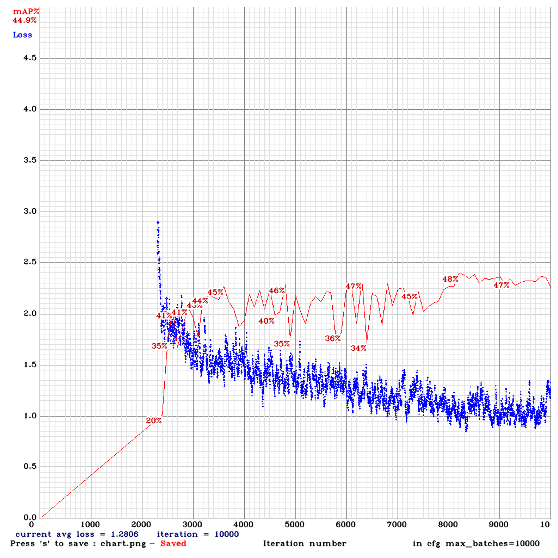

In [0]:
imShow('chart.png')

In [0]:
ls

In [0]:
from google.colab import files
uploaded = files.upload() 
for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)
    print ('saved file', name)

In [0]:
!./darknet detector test data_for_colab/obj.data data_for_colab/yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_best.weights photo2.jpg -i 0 -thresh 0.1

 CUDA-version: 8000 (10010), GPU count: 1  
 OpenCV version: 3.2.0
net.optimized_memory = 0 
batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 256 0.399 BF
   9 max                2x 2/ 2     26 x  26 x 256 ->   13 x  13 x 256 0.000 BF
 

In [0]:
!./darknet detector map data_for_colab/obj.data data_for_colab/yolov3-tiny-obj.cfg yolov3-tiny-obj_best.weights

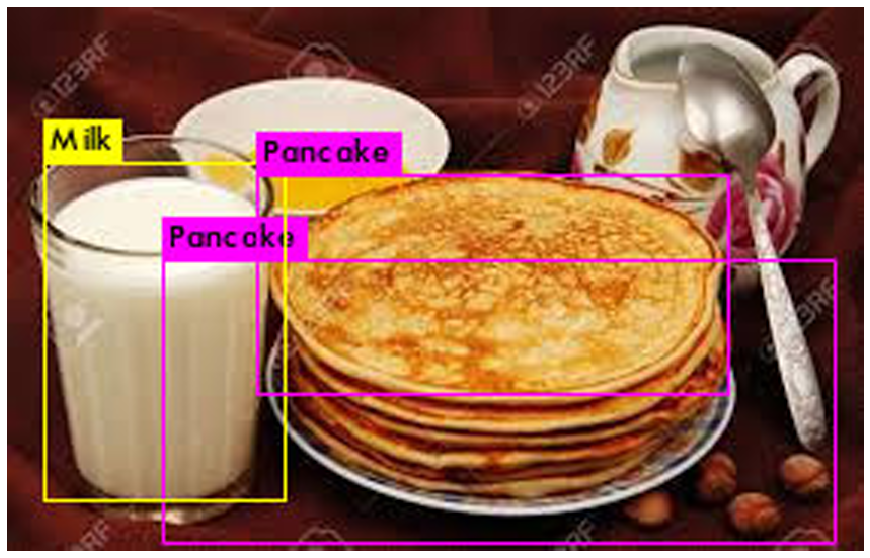

In [0]:
imShow('predictions.jpg')
